# Practica del curso "Introduccion a la geointeligencia computacional"
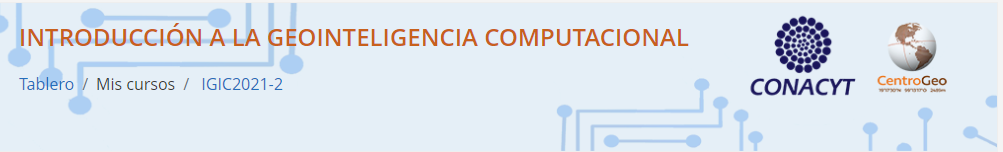
trabajo por: Pablo Murillo

### Instalamos snscrape desde nuestra consola con:
pip install snscrape
### Instalamos simplejson desde nuestra consola con:
pip install simplejson

## Preparacion

#### En caso de no contar con una linea de comandos para realziar la instalación con pip install, ejecute la siguiente linea

In [1]:
!pip install snscrape
!pip install simplejson

In [2]:
#Importamos la libreria que nos permite hacer las busquedas en twitter
import snscrape.modules.twitter as twitter

## Obtención de tuits

In [8]:
query = "atropellado"
limit = 5

In [10]:
#Obtiene los tuits segun el limite marcado con -limit- en los que mencionamos la palabra atropellado o lo mencionado en -query- 

for i , tweet in enumerate(twitter.TwitterSearchScraper(query).get_items()):
    if i == limit:
        break
    print(tweet, tweet.content, "\n" )

https://twitter.com/JCMunguiaA92/status/1468299598053535746 Un hombre resultó lesionado tras ser atropellado por un 380 en la Colonia la ladrillera en el municipio de San Pedro Tlaquepaque sobre la lateral del anillo periférico y la avenida Juan de la Barrera. Trasladado por elementos de la cruz verde para mayor atención @TelediarioGDL https://t.co/vabtOfhP4f 

https://twitter.com/SaverioVivas2/status/1468299204573474821 @MariaPiaLayseca HAGAMOS FAMOSA LA CLINICA |
EN PERÚ | Los paramédicos le piden a la encargada de esta clínica que reciba a un joven de 15 años que fue atropellado, y ella replica que no puede, porque no tiene los datos del paciente para verificar si tiene seguro (es decir dinero)
#GenteMiserable 

https://twitter.com/VedetteOK/status/1468299039699615751 A las 18 me voy a caminar de vuelta y después ojalá sea atropellado por un Renault 12 

https://twitter.com/SaverioVivas2/status/1468298596684550151 EN PERÚ | Vean esto... Los paramédicos le piden a la encargada de est

In [11]:
#Obtenemos los atributos asiganados a cada tuit
for i , tweet in enumerate(twitter.TwitterSearchScraper(query).get_items()):
    if i == limit:
        break
    print(tweet, tweet._asdict , "\n" )

https://twitter.com/Bethwtf0/status/1468300047821549573 <bound method Tweet._asdict of Tweet(url='https://twitter.com/Bethwtf0/status/1468300047821549573', date=datetime.datetime(2021, 12, 7, 19, 23, 5, tzinfo=datetime.timezone.utc), content='LE HA ATROPELLADO JAJAJAJAJ', id=1468300047821549573, username='Bethwtf0', outlinks=[], outlinksss='', tcooutlinks=[], tcooutlinksss='')> 

https://twitter.com/JCMunguiaA92/status/1468299598053535746 <bound method Tweet._asdict of Tweet(url='https://twitter.com/JCMunguiaA92/status/1468299598053535746', date=datetime.datetime(2021, 12, 7, 19, 21, 18, tzinfo=datetime.timezone.utc), content='Un hombre resultó lesionado tras ser atropellado por un 380 en la Colonia la ladrillera en el municipio de San Pedro Tlaquepaque sobre la lateral del anillo periférico y la avenida Juan de la Barrera. Trasladado por elementos de la cruz verde para mayor atención @TelediarioGDL https://t.co/vabtOfhP4f', id=1468299598053535746, username='JCMunguiaA92', outlinks=[],

# Georreferenciación

In [26]:
import requests
import simplejson as json 

In [83]:
#Creamos la funcion para obtener coordenadas de un tuit en la busqieda de un texto
def geoparseMX(text):
    """Geoparsing service for mexican spanish
       see http://geoparsing.geoint.mx/mx/info/
    """
    geoparser_url = "http://geoparsing.geoint.mx/ws/"
    data = dict({"text" : text})
    try:
        response = requests.post(geoparser_url, json = data, headers={"Content-Type":"application/json"})
        jresponse = response.json()
        #print(json.dumps(jresponse, encoding="utf8", indent=2, ensure_ascii=False))
        for e in jresponse['entities']:
            place = e['nominatim'][0]
            if place['geojson']['type'] == 'Point':
                coords = place['geojson']['coordinates']
                return coords
    except Exception as e:
        coords = None
    return None

In [84]:
g = geoparseMX("Mi nombre es Alex y soy originario de la ciudad de México")

In [85]:
print(g)

[-99.1333416, 19.4326009]


In [86]:
f = geoparseMX("Me encanta estar en la ciudad de León")

In [77]:
print(f)

None


## Mapa


In [ ]:
query = "atropellado"
limit = 5
points = []
for tweet in twitter.TwitterSearchScraper(query).get_items():
    try:
        coords = geoparceMX(tweet.content)
        if coords != None:
            points.append(coords)
    except:
        continue

In [ ]:
print(points)